In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab
import scipy

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('C:/Users/Ashley.Jones/Documents/Insight/csv_data/all_data/final/out_with_TOT_2019.csv')

codes = ['ovechal01','crosbsi01','malkiev01','zettehe01','richabr01','kanepa01','datsypa01','toewsjo01','backsni02','giroucl01','jagrja01','callary01','nashri01','hossama01','nealja01','pariseza01','thornjo01','bergepa01','mcdonry01','mcdavco01','matthau01','tarasvl01'] 
values = [0.9,1,0.33,0.11,0.29,1,0.57,0.9,0.11,0.56,0.125,0.33,0.11,0.14,0.11,0.22,0.22,0.22,0.33,1,1,0.33]

df.head()  

,Code,First_name,Last_name,Position,Shoots,Draft_year,Draft_round,Height,Weight,DOB,...,P,P1,GS,C+/-,G+/-,GF%,xG+/-,iP+/-,iCF,iCF/60
0,abbotsp01,Spencer,Abbott,LW,R,2010,2.059,175,170,1988-04-30,...,0.0,0.0,-0.50,-7.0,-2.0,0.0,-0.27,0.0,2.0,22.77
1,abbotsp01,Spencer,Abbott,LW,R,2010,2.059,175,170,1988-04-30,...,0.0,0.0,0.32,5.0,0.0,NaN,-0.10,0.0,2.0,14.00
2,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,1987-02-25,...,0.0,0.0,0.38,1.0,0.0,50.0,0.49,-1.0,8.0,20.86
3,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,1987-02-25,...,0.0,0.0,0.81,13.0,0.0,NaN,0.62,0.0,7.0,22.59
4,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,1987-02-25,...,6.0,6.0,11.00,29.0,-12.0,30.0,1.85,3.0,132.0,16.55


In [3]:
df2=df.copy()
df2=df2.rename(columns = {'CF% QoC':'CFQoC'})
df2=df2.rename(columns = {'CF% QoT':'CFQoT'})
df2=df2.rename(columns = {'TOI% QoT':'TOIQoT'})

tmplst = list(df2['TOI% QoC'])
del df2['TOI% QoC']
df2['TOIQoC'] = tmplst

df2['Age_dot'] = df2['Age']
del df2['Age']
age = []
nsalary = []
maxvalue=[]
tps = [] 
dp=[]

for i in range(0,len(df2)):
    
    age.append((df2['Year'][i] -df2['Draft_year'][i]) + 18)
     
    temp = df2[df2['Year'] == df2['Year'][i]]
    maxvalue = temp['Salary'].max()
    nsalary.append(df2['Salary'][i]/maxvalue)
    tps.append(df2['OPS'][i] + df2['DPS'][i])
    
    #dp.append(df2['Draft_round'][i][0])
   
df2['Age'] = age  
df2['Salary_norm'] = nsalary
df2['TPS'] = tps

df2['CodeL'] = (np.nan)*len(df2)

codesu = df2['Code'].unique()
values=[]
for i in range(0,len(codesu)):
    info= df2[df2['Code'] == codesu[i]]
    idi = info.index.values.tolist()
    df2['CodeL'][idi]     = int(i+1)  
    
     
df2.info() 
df3 = df2.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10590 entries, 0 to 10589
Data columns (total 86 columns):
Code           10590 non-null object
First_name     10590 non-null object
Last_name      10590 non-null object
Position       10590 non-null object
Shoots         10590 non-null object
Draft_year     10590 non-null int64
Draft_round    10590 non-null float64
Height         10590 non-null int64
Weight         10590 non-null int64
DOB            10590 non-null object
Country        10590 non-null object
Place          10590 non-null object
Year           10590 non-null int64
Team           10590 non-null object
Games          10590 non-null int64
Goals          10590 non-null int64
Assists        10590 non-null int64
Points         10590 non-null int64
PM             10590 non-null int64
Pen            10590 non-null int64
G_ev           10590 non-null int64
G_pp           10590 non-null int64
G_sh           10590 non-null int64
Gwg            10590 non-null int64
A_ev           1

In [138]:

#df4=df3[(df3['Year']>=2017) & (df3['Year']<=2019)]
df4=df3[df3['Year']==2018]
df4 = df4.fillna(df4.mean())
df4.loc[df4['PDO']<1, 'PDO']=100
df4.loc[df.Country == 'SU', 'Country'] = "RU"

In [139]:
#df4=df4.drop_duplicates(['Code'],keep='last')
df4=df4.reset_index(drop=True)
names = df4['Code'].unique()


In [140]:
df4.describe()

,Draft_year,Draft_round,Height,Weight,Year,Games,Goals,Assists,Points,PM,...,xG+/-,iP+/-,iCF,iCF/60,TOIQoC,Age_dot,Age,Salary_norm,TPS,CodeL
count,890.000000,890.000000,890.000000,890.000000,890.0,890.000000,890.000000,890.000000,890.000000,890.000000,...,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2009.171910,2.778927,185.295506,199.634831,2018.0,51.411236,8.369663,14.106742,22.476404,-0.419101,...,0.002834,-0.869615,135.058957,10.997971,28.607596,27.263819,26.828090,0.221776,2.621461,1128.941573
std,4.591857,2.050777,5.416020,15.450429,0.0,28.696729,9.239799,14.139306,21.996932,10.549720,...,5.017941,5.543570,98.297973,3.571273,0.715440,4.318970,4.591857,0.203069,2.807146,678.477848
min,1990.000000,1.001000,163.000000,154.000000,2018.0,1.000000,0.000000,0.000000,0.000000,-42.000000,...,-18.030000,-23.000000,0.000000,0.000000,25.390000,19.029763,19.000000,0.013095,-1.000000,2.000000
25%,2006.000000,1.017000,183.000000,190.000000,2018.0,23.000000,1.000000,3.000000,4.000000,-6.000000,...,-2.757500,-4.000000,43.000000,8.885000,28.130000,24.128314,23.000000,0.071429,0.300000,535.250000
50%,2010.000000,2.047000,185.000000,200.000000,2018.0,62.000000,5.000000,10.000000,16.000000,0.000000,...,-0.225000,-0.869615,132.000000,11.025000,28.608798,26.535612,26.000000,0.090476,1.800000,1093.000000
75%,2013.000000,4.105000,188.000000,210.000000,2018.0,77.000000,13.000000,21.000000,34.000000,4.000000,...,2.345000,2.000000,206.000000,12.990000,29.150000,29.985864,30.000000,0.361905,4.200000,1715.750000
max,2017.000000,9.291000,206.000000,260.000000,2018.0,82.000000,49.000000,68.000000,108.000000,49.000000,...,16.310000,24.000000,584.000000,24.300000,30.280000,46.604711,46.000000,1.000000,13.100000,2368.000000


In [141]:
teams = df4.groupby(['Year','Team'], as_index=False).mean()

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]

for i in range(0,len(df4)):
    
    # a scaling value to provide stats as if they were for a full 82 games
    rate = 82.0/df4['Games'][i]
    # Adjusted OZS. Adjusts for team's average OZS.
    ozs_adj = float(teams[(teams['Year']==df4['Year'][i]) & (teams['Team']==df4['Team'][i])].OZS)-50
    # Games played during season
    gm.append(df4['Games'][i])
    # total blocks through 82 games
    blk.append(0.0008*rate*float(df4['BLK'][i]))
    # total hit through 82 games
    hit.append(0.0008*rate*float(df4['HIT'][i]))
    # Take-aways minus Give-aways through 82 games
    gwy.append(0.0008*rate*float(df4['TKY'][i] - df4['GWY'][i]))
    # Penalties drawn minus penalties taken through 82 games
    pen.append(0.00036*rate*float(df4['iPEND'][i] - df4['iPENT'][i]))
    # FO won minus FO lost through 82 games
    fo.append(0.00036*float(df4['FOW'][i] - df4['FOL'][i]))
    # Average Time on Ice per game
    toi.append(0.0004*float(df4['TOI_avg'][i])**2)
    # Defensive rating
    defn.append(100*float(df4['CFQoC'][i] * (ozs_adj+100-df4['OZS'][i])) / 530000 * ((df4['CF%'][i])/50) * ((df4['xGF%'][i])/50))
    # weighted total points through 82 games adjusted for PDO and DPS
    pts.append((2.05*rate*df4['Points'][i] / df4['PDO'][i]) + (2.35*rate*df4['DPS'][i] / df4['PDO'][i]))
    # Stacking
    GSS_adj.append((pts[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+toi[i]+defn[i]))
    
    # Apply Sigmoid function
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        

In [142]:
i

889

In [143]:
teams = df4.groupby(['Year','Team'], as_index=False).mean()

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]

for i in range(0,len(df4)):
    
    # a scaling value to provide stats as if they were for a full 82 games
    rate = 82.0/df4['Games'][i]
    # Adjusted OZS. Adjusts for team's average OZS.
    ozs_adj = float(teams[(teams['Year']==df4['Year'][i]) & (teams['Team']==df4['Team'][i])].OZS)-50
    # Games played during season
    gm.append(df4['Games'][i])
    # total blocks through 82 games
    blk.append(0.0008*rate*float(df4['BLK'][i]))
    # total hit through 82 games
    hit.append(0.0008*rate*float(df4['HIT'][i]))
    # Take-aways minus Give-aways through 82 games
    gwy.append(0.0008*rate*float(df4['TKY'][i] - df4['GWY'][i]))
    # Penalties drawn minus penalties taken through 82 games
    pen.append(0.00036*rate*float(df4['iPEND'][i] - df4['iPENT'][i]))
    # FO won minus FO lost through 82 games
    fo.append(0.00036*float(df4['FOW'][i] - df4['FOL'][i]))
    # Average Time on Ice per game
    toi.append(0.0004*float(df4['TOI_avg'][i])**2)
    # Defensive rating
    defn.append(float(df4['CFQoC'][i] * (ozs_adj+100-df4['OZS'][i])) / 5800 * 
                (((df4['CF%'][i])/50 * (df4['CF%'][i] - df4['CFQoT'][i] + 50)/50)) * ((df4['xGF%'][i])/50))
    # weighted total points through 82 games adjusted for PDO and DPS
    pts.append((2.05*rate*df4['Points'][i] / df4['PDO'][i]) + (2.35*rate*df4['DPS'][i] / df4['PDO'][i]))
    # Stacking
    GSS_adj.append((pts[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+toi[i]+defn[i]))
    
    # Apply Sigmoid function
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        

In [144]:
d = {'Code': df4['Code'], 'First_name': df4['First_name'], 'Last_name': df4['Last_name'], 'Team': df4['Team'], 'Nation': df4['Country'], 'Position': df4['Position'], 'Year': df4['Year'], 'Gms':gm, 'P_adj': pts, 'BLK': blk, 'HIT': hit, 'GWY': gwy, 'PEN': pen, 'FO': fo,'TOI': toi, 'DEFN': defn, 'GSS_adj': GSS_adj, 'Rating': rating}

ratings = pd.DataFrame(data=d)

ratings.loc[ratings.Gms <10, 'Rating']=0.50

ratings.drop(ratings[ratings.Gms <= 10].index, inplace=True)


In [145]:
#ratings.to_csv('11-years_ratings.csv')
ratings.to_csv('ratings_2018.csv')

In [91]:
ratings.sort_values(by=['DEFN'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
1781,nolanjo01,Jordan,Nolan,STL,CA,C,2019,14,0.259372,0.018743,0.103086,0.004686,-0.006326,-0.00036,0.022861,0.906670,1.308731,0.787301
1484,lowryad01,Adam,Lowry,WPG,US,LW,2018,45,0.829778,0.040818,0.180764,0.024782,0.001968,0.02844,0.084565,0.808718,1.999834,0.880780
155,bergepa01,Patrice,Bergeron,BOS,CA,C,2017,79,1.221727,0.039028,0.044841,0.034876,0.000000,0.13104,0.148225,0.794079,2.413815,0.917875
1127,hykato01,Tomas,Hyka,VEG,CZ,RW,2019,17,0.447752,0.019294,0.023153,0.007718,0.001736,0.00000,0.052533,0.765026,1.317211,0.788717
2348,staaljo01,Jordan,Staal,CAR,CA,C,2019,50,1.009635,0.023616,0.160064,0.020992,-0.002362,0.04284,0.132060,0.753441,2.140286,0.894758
1640,meierti01,Timo,Meier,SJS,CH,RW,2017,34,0.336371,0.009647,0.123482,-0.007718,0.000868,-0.00108,0.060319,0.751046,1.272937,0.781245
1536,marchbr03,Brad,Marchand,BOS,CA,LW,2017,80,1.887482,0.028700,0.041820,-0.012300,-0.003690,-0.00360,0.148379,0.735426,2.822218,0.943865
1429,leivojo01,Josh,Leivo,TOR,CA,LW,2017,13,1.324047,0.020185,0.025231,0.045415,0.004542,0.00000,0.060910,0.729291,2.209621,0.901110
2479,tkachma01,Matthew,Tkachuk,CGY,US,LW,2017,76,1.102144,0.018989,0.056105,0.011221,0.001554,-0.00252,0.082944,0.724581,1.995018,0.880273
2441,tatarto01,Tomas,Tatar,MTL,CS,C,2019,80,1.260485,0.024600,0.063140,0.006560,-0.001845,-0.00684,0.105625,0.721451,2.173176,0.897815


# Contribution of top three parameters

Text(0.5,1,'Contribution of DEFN')

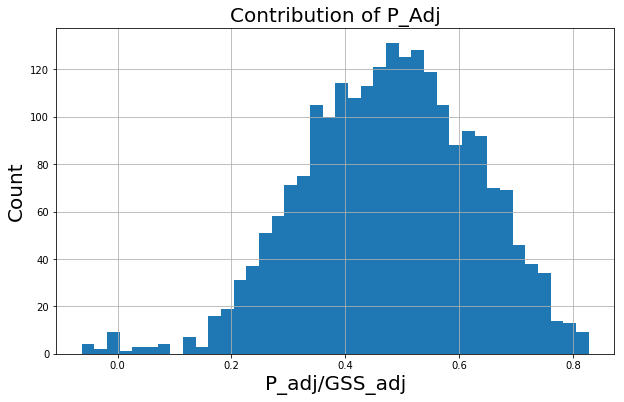

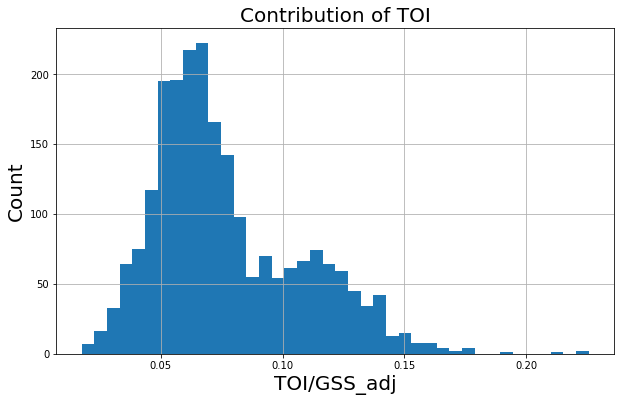

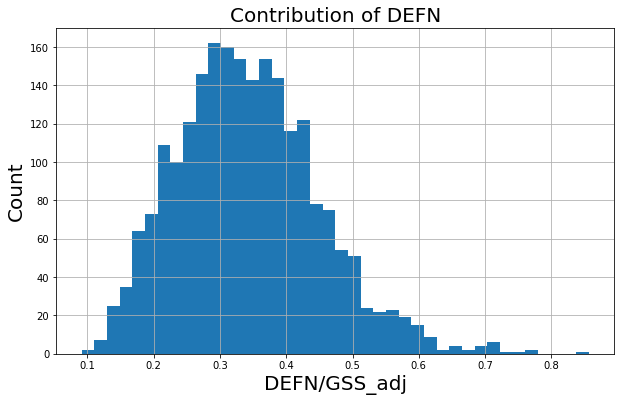

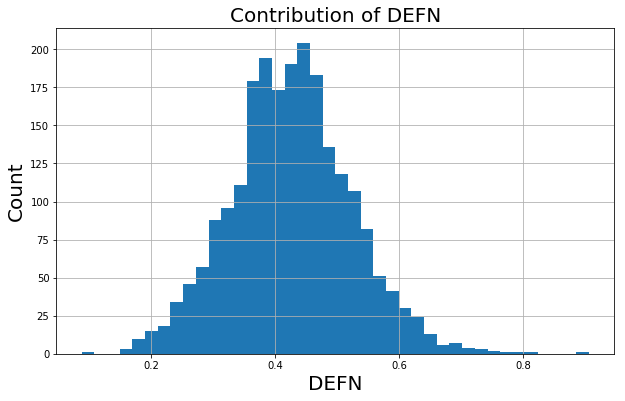

In [92]:
plt.figure(figsize=(10,6))
(ratings['P_adj'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('P_adj/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of P_Adj',size=20)
plt.figure(figsize=(10,6))
(ratings['TOI'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('TOI/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of TOI',size=20)
plt.figure(figsize=(10,6))
(ratings['DEFN'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('DEFN/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of DEFN',size=20)
plt.figure(figsize=(10,6))
(ratings['DEFN']).hist(bins=40)
plt.xlabel('DEFN',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of DEFN',size=20)

In [93]:
print((ratings['DEFN'] / ratings['GSS_adj']).mean())
print((ratings['P_adj'] / ratings['GSS_adj']).mean())
print((ratings['TOI'] / ratings['GSS_adj']).mean())

0.34234487951488235
0.4765434598074779
0.07701477357384952


In [94]:
ratings.describe()

,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,2018.015695,60.008969,0.698802,0.051303,0.080849,-0.006740,-0.000626,0.000044,0.104289,0.426337,1.354258,0.784577
std,0.815521,22.014289,0.426383,0.035583,0.049157,0.018003,0.002925,0.014541,0.052264,0.097507,0.474134,0.071520
min,2017.000000,11.000000,-0.037836,0.000000,0.000000,-0.080800,-0.016102,-0.083160,0.011321,0.088376,0.344878,0.585375
25%,2017.000000,45.000000,0.386836,0.024928,0.043185,-0.017479,-0.002417,-0.002160,0.062800,0.364844,1.016063,0.734205
50%,2018.000000,68.000000,0.593040,0.037486,0.070582,-0.004302,-0.000547,0.000000,0.095852,0.425435,1.264759,0.779844
75%,2019.000000,79.000000,0.932137,0.072243,0.110786,0.005964,0.001135,0.000000,0.134836,0.488194,1.620773,0.834902
max,2019.000000,84.000000,2.607644,0.205482,0.341120,0.051117,0.011880,0.152280,0.297461,0.906670,3.177437,0.959976


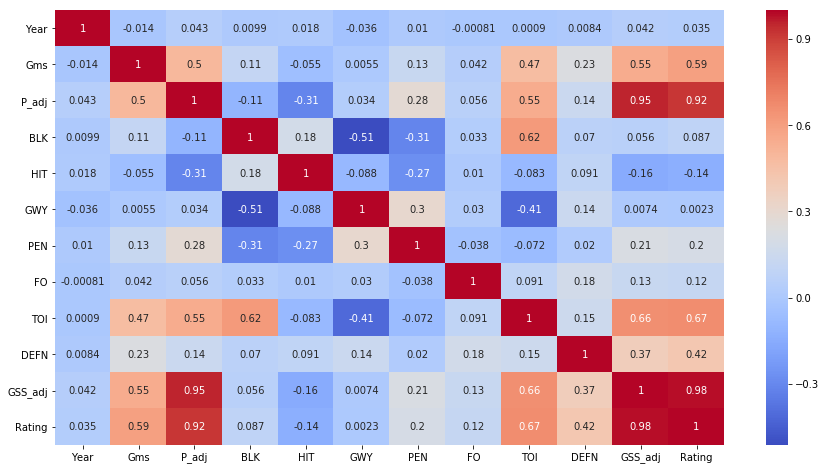

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(ratings.corr(),cmap='coolwarm',annot=True)


# Pick a player to view by last name

In [112]:
ratings[ratings['Last_name'] == 'Ekholm']

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
659,ekholma01,Mattias,Ekholm,NSH,SE,D,2017,82,0.570131,0.086400,0.048800,-0.022400,-0.002160,0.00000,0.216783,0.540330,1.437884,0.808127
660,ekholma01,Mattias,Ekholm,NSH,SE,D,2018,81,0.823278,0.094756,0.060741,-0.025916,-0.001822,-0.00036,0.218089,0.563926,1.732691,0.849756
661,ekholma01,Mattias,Ekholm,NSH,SE,D,2019,80,1.054610,0.087740,0.055760,-0.030340,-0.002583,0.00000,0.215667,0.566568,1.947422,0.875165


# Change by=['***'] to choice for ranking

In [97]:
ratings_avg = ratings.groupby(['Code','First_name','Last_name','Team','Nation','Position'], as_index=False).mean()
ratings_avg.sort_values(by=['Rating'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
779,mcdavco01,Connor,McDavid,EDM,CA,C,2018.0,80.666667,2.289953,0.028410,0.027467,0.020403,0.008858,-0.03948,0.187411,0.462720,2.985744,0.951560
750,marchbr03,Brad,Marchand,BOS,CA,LW,2018.0,75.666667,2.056642,0.022865,0.038571,-0.016808,-0.000756,-0.00612,0.149823,0.551554,2.795771,0.942438
657,kucheni01,Nikita,Kucherov,TBL,RU,RW,2018.0,78.666667,2.222500,0.018277,0.029072,-0.014775,0.001257,-0.00024,0.151225,0.402790,2.810104,0.941653
227,crosbsi01,Sidney,Crosby,PIT,CA,C,2018.0,78.666667,2.019602,0.029374,0.066852,-0.021703,0.001297,0.03012,0.165199,0.486667,2.777408,0.940882
1207,tavarjo01,John,Tavares,TOR,CA,C,2019.0,82.000000,1.800584,0.042400,0.047200,-0.015200,0.001080,0.05004,0.145161,0.540665,2.611930,0.931625
73,bergepa01,Patrice,Bergeron,BOS,CA,C,2018.0,69.333333,1.655794,0.047544,0.045812,0.021113,-0.000915,0.08964,0.143422,0.603815,2.606225,0.929981
1163,stamkst01,Steven,Stamkos,TBL,CA,C,2018.0,59.000000,1.956730,0.024337,0.063313,-0.003405,-0.001718,0.01356,0.130431,0.394354,2.577603,0.929087
1179,stonema01,Mark,Stone,TOT,CA,RW,2019.0,77.000000,1.630905,0.060488,0.061340,0.051117,0.002300,-0.00216,0.152568,0.608359,2.564919,0.928569
899,oreilry01,Ryan,O'Reilly,STL,CA,C,2019.0,82.000000,1.621436,0.028800,0.024800,0.048800,0.003600,0.09432,0.167445,0.571616,2.560817,0.928297
613,karlser01,Erik,Karlsson,SJS,SE,D,2019.0,53.000000,1.553931,0.085404,0.054460,-0.004951,-0.001671,0.00000,0.236002,0.598094,2.521269,0.925619


# Change ['Position']=='?' to choice (C,LW,RW,D)

In [119]:
ratings_D = ratings_avg[ratings_avg['Position']=='D']
ratings_D.sort_values(by=['DEFN'],ascending=False)

TypeError: list indices must be integers or slices, not str

# 3-year Weighted average

In [125]:
codes = ratings['Code'].unique()
ratings_avg = []
ratings_hist1 = []
lastname=[]
firstname=[]
team=[]
nation= []
position=[]
for i in range(0,len(codes)):
    
    temp = ratings[ratings['Code'] == codes[i]].reset_index(drop=True)
    temp = temp.drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)
    firstname.append(temp['First_name'][0])
    lastname.append(temp['Last_name'][0])
    team.append(temp["Team"].iloc[-1])
    nation.append(temp['Nation'][0])
    position.append(temp['Position'][0])
   
    
    if len(temp) == 3:
        
        ratings_avg.append(float(0.5*temp['Rating'][2]) + float(0.3*temp['Rating'][1]) + float(0.2*temp['Rating'][0]))
        ratings_hist1.append(float(temp['Rating'][0]))
    elif len(temp) == 2:
        
        ratings_avg.append(float(0.6*temp['Rating'][1]) + float(0.4*temp['Rating'][0]))
                           
    elif len(temp) == 1:
                           
        ratings_avg.append(float(temp['Rating']))
                           

e = {'Code': codes, 'First_name': firstname, 'Last_name': lastname, 'Team': team, 'Nation': nation, 'Position': position, 'Rating': ratings_avg}

ratings_wavg = pd.DataFrame(data=e)
       



In [129]:
ratings_wavg.sort_values(by=['Rating'],ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,mcdavco01,Connor,McDavid,EDM,CA,C,0.953776
1,kucheni01,Nikita,Kucherov,TBL,RU,RW,0.946511
2,crosbsi01,Sidney,Crosby,PIT,CA,C,0.943799
3,marchbr03,Brad,Marchand,BOS,CA,LW,0.942209
4,bergepa01,Patrice,Bergeron,BOS,CA,C,0.934887
5,barkoal01,Aleksander,Barkov,FLA,FI,C,0.931962
6,stamkst01,Steven,Stamkos,TBL,CA,C,0.929047
7,hallta02,Taylor,Hall,NJD,CA,LW,0.927089
8,draisle01,Leon,Draisaitl,EDM,DE,C,0.926125
9,wheelbl01,Blake,Wheeler,WPG,US,RW,0.925574


In [34]:
ratings_wavg.to_csv('2019_ratings_3avg.csv')

# Change nationality: ['Nation'] == 'CA', to US, CA, RU, SE, CZ, CH, DE, FI for main countries. Also change : sort_values(by=['?','?'], to choice of paramter

In [105]:

ratings_wavg[ratings_wavg['Nation'] == 'CA'].sort_values(by=['Rating','Position'],ascending=True).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,gazdilu01,Luke,Gazdic,NJD,CA,LW,0.585375
1,oreilca01,Cal,O'Reilly,BUF,CA,C,0.598048
2,gordobo01,Boyd,Gordon,PHI,CA,C,0.607216
3,dalpeza01,Zac,Dalpe,CBJ,CA,RW,0.616010
4,thornsh01,Shawn,Thornton,FLA,CA,RW,0.622281
5,bigrach01,Chris,Bigras,COL,CA,D,0.629394
6,mcleoco01,Cody,McLeod,TOT,CA,LW,0.633376
7,geliner01,Eric,Gelinas,COL,CA,D,0.637061
8,mitchza01,Zack,Mitchell,MIN,CA,RW,0.643825
9,laichbr01,Brooks,Laich,LAK,CA,C,0.644949


# Select by Team: ratings_wavg['Team'] == '?'

In [108]:

ratings_wavg[ratings_wavg['Team'] == 'NSH'].sort_values(by=['Rating'],ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,josiro01,Roman,Josi,NSH,CH,D,0.893262
1,forsbfi01,Filip,Forsberg,NSH,SE,C,0.890534
2,johanry01,Ryan,Johansen,NSH,CA,C,0.883070
3,arvidvi01,Viktor,Arvidsson,NSH,SE,LW,0.876456
4,ellisry01,Ryan,Ellis,NSH,CA,D,0.873625
5,subbapk01,P.K.,Subban,NSH,CA,D,0.871602
6,ekholma01,Mattias,Ekholm,NSH,SE,D,0.854135
7,smithcr01,Craig,Smith,NSH,US,C,0.816897
8,turriky01,Kyle,Turris,NSH,CA,C,0.807441
9,boninni01,Nick,Bonino,NSH,US,C,0.803570


# Comparison to EA sports

In [109]:
EAS = pd.read_csv('D:/Python/Insight/NHL_player_rating/2018-2019_ratings_EAS.csv')
EAS['Rating'] = EAS['Rating']*100

In [110]:
EAS.head()

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Rating,EA Sports
0,0,beaucfr01,Francois,Beauchemin,ANA,CA,D,77.887372,NaN
1,1,biekske01,Kevin,Bieksa,ANA,CA,D,73.463496,NaN
2,2,bollja01,Jared,Boll,ANA,US,RW,61.289810,NaN
3,3,coglian01,Andrew,Cogliano,ANA,CA,LW,81.579154,81.0
4,4,getzlry01,Ryan,Getzlaf,ANA,CA,C,92.799364,88.0


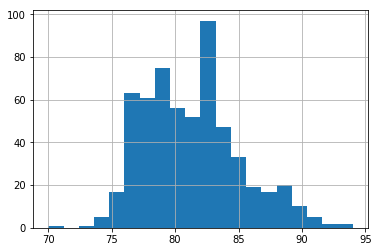

In [111]:
EAS['EA Sports'].hist(bins=20)


In [112]:
EAS = EAS.dropna()
EAS = EAS[EAS['Rating']>=73]

In [113]:
EAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 3 to 975
Data columns (total 9 columns):
Unnamed: 0    527 non-null int64
Code          527 non-null object
First_name    527 non-null object
Last_name     527 non-null object
Team          527 non-null object
Nation        527 non-null object
Position      527 non-null object
Rating        527 non-null float64
EA Sports     527 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 41.2+ KB


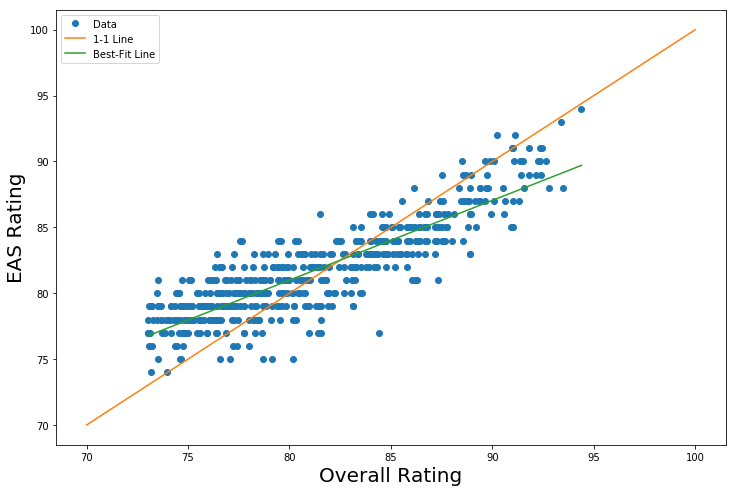

In [114]:
f, ax=plt.subplots(1,figsize=[12,8])

plt.plot(EAS['Rating'], EAS['EA Sports'],'o',[70,100],[70,100])
plt.plot(np.unique(EAS['Rating']), np.poly1d(np.polyfit(EAS['Rating'], EAS['EA Sports'], 1))(np.unique(EAS['Rating'])))
ax.legend(['Data', '1-1 Line','Best-Fit Line'])
plt.xlabel('Overall Rating',size=20)
plt.ylabel('EAS Rating',size=20)
pylab.savefig('dist.png')

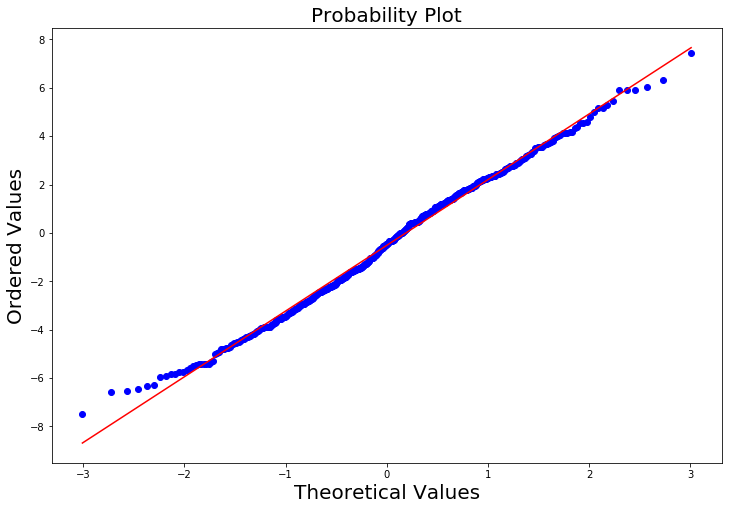

In [115]:
import numpy as np 
import pylab 
import scipy.stats as stats
f=plt.figure(3,figsize=[12,8])
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(EAS['Rating'] - EAS['EA Sports'], dist="norm", plot=pylab)

plt.xlabel('Theoretical Values',size=20)
plt.ylabel('Ordered Values',size=20)
plt.title('Probability Plot',size=20)

pylab.show()

In [116]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(EAS['Rating'], EAS['EA Sports'])
print('Slope: ' + str(slope))
print('Intercept: ' + str(intercept))
print('R2 Value: ' + str(r_value**2))
print('P-value for slope: ' + str(p_value))
print('RMSE: ' + str(((sum((EAS['Rating'] - EAS['EA Sports'])**2)) / len(EAS['EA Sports']))**0.5))

print('R_value: ' + str(np.corrcoef(EAS['Rating'], EAS['EA Sports'])))

Slope: 0.6052087402671583
Intercept: 32.57714651819538
R2 Value: 0.7551209719820167
P-value for slope: 1.592837986543966e-162
RMSE: 2.759370003157291
R_value: [[1.         0.86897697]
 [0.86897697 1.        ]]


# Significance test

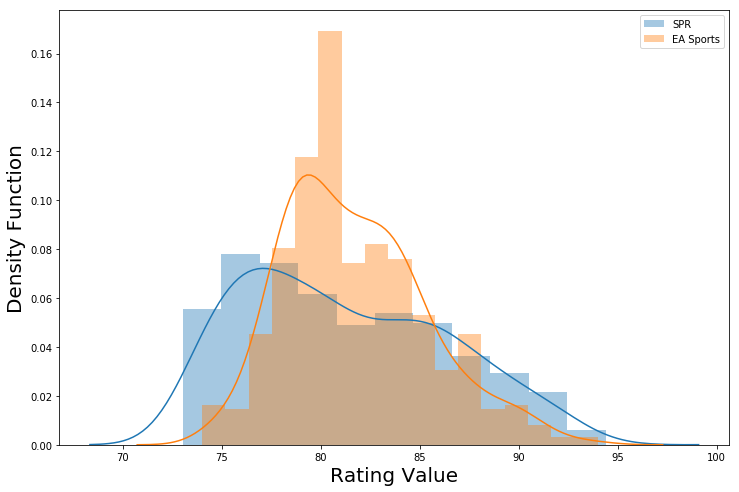

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(EAS['Rating'])
sns.distplot(EAS['EA Sports'])

ax.legend(['SPR', 'EA Sports'])
plt.xlabel('Rating Value',size=20)
plt.ylabel('Density Function',size=20)
pylab.savefig('hist.png')

In [48]:
EAS_stats = EAS.describe()
EAS_stats.drop(['Unnamed: 0'],axis=1)

,Rating,EA Sports
count,527.000000,527.000000
mean,81.217273,81.730550
std,5.178374,3.606537
min,73.036241,74.000000
25%,76.795525,79.000000
50%,80.441034,81.000000
75%,85.267303,84.000000
max,94.390541,94.000000


In [49]:
# Wilcoxon signed-rank test. A paired test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(EAS['EA Sports'],EAS['Rating'])
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=55213.000, p=0.000041
Different distribution (reject H0)


In [124]:
# create function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample
# create function to calculate mean of the sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)
# combine functions to create a sample distribution
# create a distribution size of 1000 and sample size of 500
def create_sample_distribution(df, dist_size=500, n=527):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist
# create sample distributions of sample mean for control and target
ctrl_sample = create_sample_distribution(EAS['EA Sports'])
exp_sample = create_sample_distribution(EAS['Rating'])

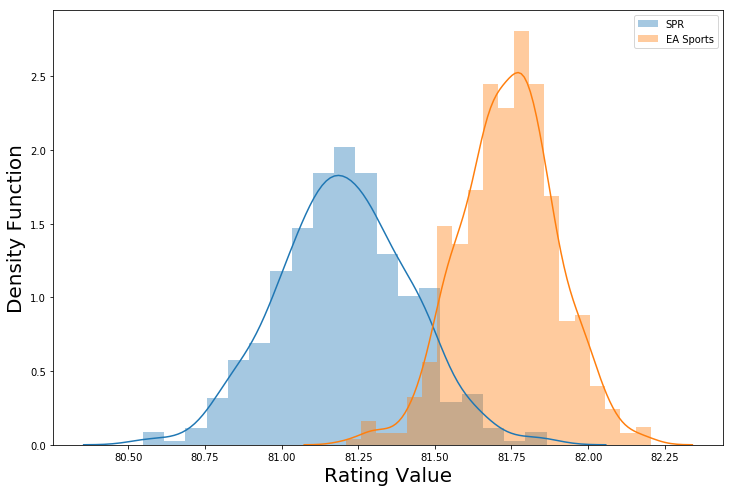

In [125]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(exp_sample)
sns.distplot(ctrl_sample)

ax.legend(['SPR','EA Sports'])
plt.xlabel('Rating Value',size=20)
plt.ylabel('Density Function',size=20)
pylab.savefig('hist1.png')

In [126]:
np.var(ctrl_sample) == np.var(exp_sample)

False

In [127]:
scipy.stats.ttest_ind(exp_sample, ctrl_sample, equal_var= False)

Ttest_indResult(statistic=-45.18351942477586, pvalue=5.005984369967293e-235)

In [128]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

print("Cohen's d:", cohend(np.array(ctrl_sample),np.array(exp_sample)) )

Cohen's d: 2.8576566816950546


In [123]:
scipy.stats.ks_2samp(EAS['EA Sports'],EAS['Rating'])

Ks_2sampResult(statistic=0.24667931688804556, pvalue=1.4307051299766067e-14)

# Sigmoid Function

In [495]:
x = np.arange(-5, 5, 0.1)
y =[]
for i in range(0,len(x)):
    
    y.append( 1 / (1 + math.exp(-x[i])) *100 )
    
    

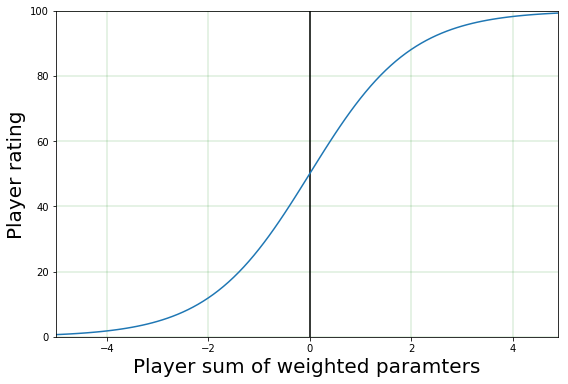

In [496]:
fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x,y)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
plt.vlines(0, ymin=0, ymax=100)
plt.grid(color='g', linestyle='-', linewidth=0.2)
plt.xlabel('Player sum of weighted paramters',size=20)
plt.ylabel('Player rating',size=20)
pylab.savefig('Sigmoid.png')

# Offensive Zone Starts for entire league 2016-2018

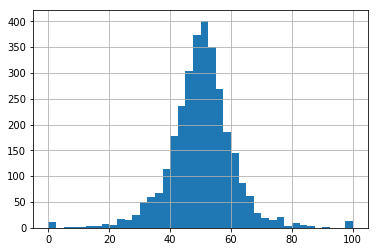

In [497]:
df4['OZS'].hist(bins=40)

# LA Kings mean OZS

In [498]:
df4[df4['Team'] == 'LAK'].OZS.mean()

54.44395604395604